In [22]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import time
from tensorflow.keras.applications.vgg16 import preprocess_input


In [23]:
MODEL_PATH = "/media/tairo/Storages/AIProject/AboutModel/TraAI/Model/TrainingModel/VGG16_TomatoDiseases.keras"
TEST_DIR = "/media/tairo/Storages/AIProject/AboutModel/TraAI/Data/test"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

Loading data
Found 920 files belonging to 3 classes.


Loading model and running predictions: 


/media/tairo/Storages/AIProject/env/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step
Generating plot: 
Confusion matrix saved as 'confusion_matrix.png'


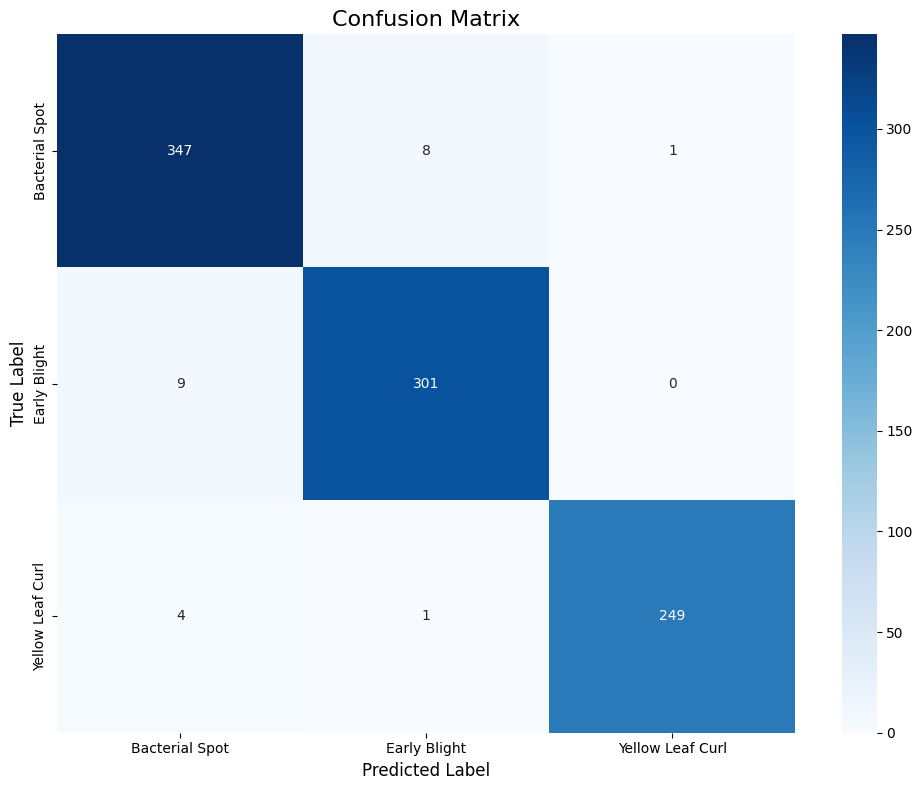

In [ ]:
print("Loading data")
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMAGE_SIZE,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)
class_names = test_dataset.class_names

# Use VGG16 specific preprocessing
def preprocess_for_eval(image, label):
    return preprocess_input(tf.cast(image, tf.float32)), label
test_dataset = test_dataset.map(preprocess_for_eval).prefetch(buffer_size=tf.data.AUTOTUNE)

#Model Loading & Prediction
print("Loading model and running predictions: ")
model = tf.keras.models.load_model(MODEL_PATH)
predictions = model.predict(test_dataset, verbose=1)

# Get predicted integer labels from probabilities
predicted_labels = np.argmax(predictions, axis=1)

# Extract true integer labels from the one-hot encoded dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(np.argmax(labels.numpy(), axis=1))

#Confusion Matrix Generation
print("Generating plot: ")
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig("confusion_matrix.png")

print("Confusion matrix saved as 'confusion_matrix.png'")
plt.show() # Display the plot window